<a href="https://colab.research.google.com/github/ar-five5/mL_Project/blob/main/Part_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part - 1**

---



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, classification_report, accuracy_score

In [25]:
curr_dir = os.getcwd()
df = pd.read_csv(curr_dir + '/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
df.shape

(1470, 35)

In [28]:
df.isnull().sum()  # our dataset doesnot contain any null entries

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [29]:
# use Lable encoder to convert the columns with textual data into numerical/int data by assinging each type of text with a number
# can be done manually by making a dict for each column with textual data and assing the keys as numbers.
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [30]:
X = df.drop(columns = ['Attrition'], axis = 1)
Y = df['Attrition']

In [31]:
print(X)
print("----------------------------------------------------------------------")
print(Y)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2                 1          2   
1      49               1        279           1                 8          1   
2      37               2       1373           1                 2          2   
3      33               1       1392           1                 3          4   
4      27               2        591           1                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1                23          2   
1466   39               2        613           1                 6          1   
1467   27               2        155           1                 4          3   
1468   49               1       1023           2                 2          3   
1469   34               2        628           1                 8          3   

      EducationField  Emplo

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3, stratify = Y)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(1470, 34) (1176, 34) (294, 34)


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=3)
dtree.fit(X_train, Y_train)

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, Y_train)

SVC(probability=True)

In [36]:
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    Y_proba = model.predict_proba(X_test)[:,1]

    f1 = f1_score(Y_test, Y_pred)
    roc = roc_auc_score(Y_test, Y_proba)
    acc = accuracy_score(Y_test, Y_pred)


    print(classification_report(Y_test, Y_pred))
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {roc:.4f}")
    print("----------------------------------------------------------")

    return f1, roc


In [37]:
# Evaluate all models
print("\nLogistic Regression:")
evaluate_model(log_reg, X_test, Y_test)

print("\nDecision Tree:")
evaluate_model(dtree, X_test, Y_test)

print("\nSVM:")
evaluate_model(svm, X_test, Y_test)


Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.72      0.38      0.50        47

    accuracy                           0.88       294
   macro avg       0.81      0.68      0.72       294
weighted avg       0.86      0.88      0.86       294

Accuracy: 0.8776
F1 Score: 0.5000
AUC-ROC: 0.7809
----------------------------------------------------------

Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       247
           1       0.30      0.36      0.33        47

    accuracy                           0.76       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.78      0.76      0.77       294

Accuracy: 0.7619
F1 Score: 0.3269
AUC-ROC: 0.5999
----------------------------------------------------------

SVM:
              precision    recall  f1-score   support

           0       0.86      

(0.21428571428571427, np.float64(0.8093720389353087))

# **Confusion matrix**

---



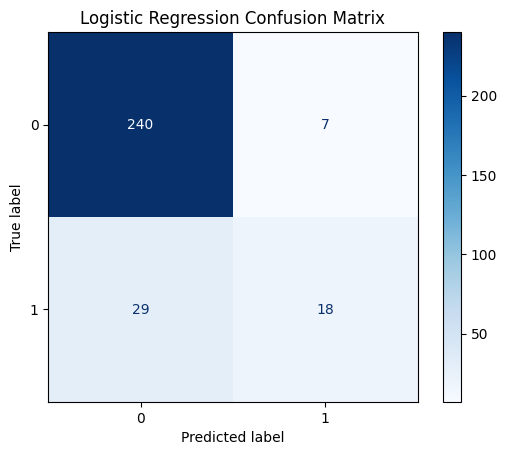

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, Y_test, title="Confusion Matrix"):
    cm = confusion_matrix(Y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Example:
plot_confusion_matrix(log_reg, X_test, Y_test, "Logistic Regression Confusion Matrix")


##  **precision_recall_curve**

---



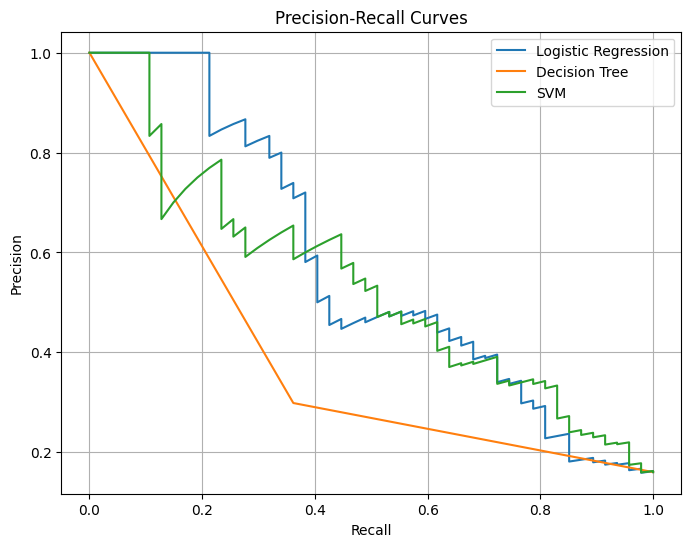

In [46]:
from sklearn.metrics import precision_recall_curve

def plot_pr_curve(model, X_test, y_test, label):
    Y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(Y_test, Y_proba)
    plt.plot(recall, precision, label=label)

plt.figure(figsize=(8, 6))
plot_pr_curve(log_reg, X_test, Y_test, "Logistic Regression")
plot_pr_curve(dtree, X_test, Y_test, "Decision Tree")
plot_pr_curve(svm, X_test, Y_test, "SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.show()


# **Part - 2**

---



In [38]:


# 1. Simple Fixed Growth (example: 8% growth)
df["FutureSalary_fixed"] = df["MonthlyIncome"] * 1.08

# 2. Performance-based Growth
def increment(x):
    if x == 4:
        return 1.10
    else:
        return 1.05

df["Increment"] = df["PerformanceRating"].apply(increment)
df["FutureSalary_perf_based"] = df["MonthlyIncome"] * df["Increment"]

# View sample
df[["MonthlyIncome", "PerformanceRating", "FutureSalary_fixed", "FutureSalary_perf_based"]].head()


,MonthlyIncome,PerformanceRating,FutureSalary_fixed,FutureSalary_perf_based
0,5993,3,6472.44,6292.65
1,5130,4,5540.40,5643.00
2,2090,3,2257.20,2194.50
3,2909,3,3141.72,3054.45
4,3468,3,3745.44,3641.40


# **Distribution of Simulated Future Salaries (Performance-based)**

---



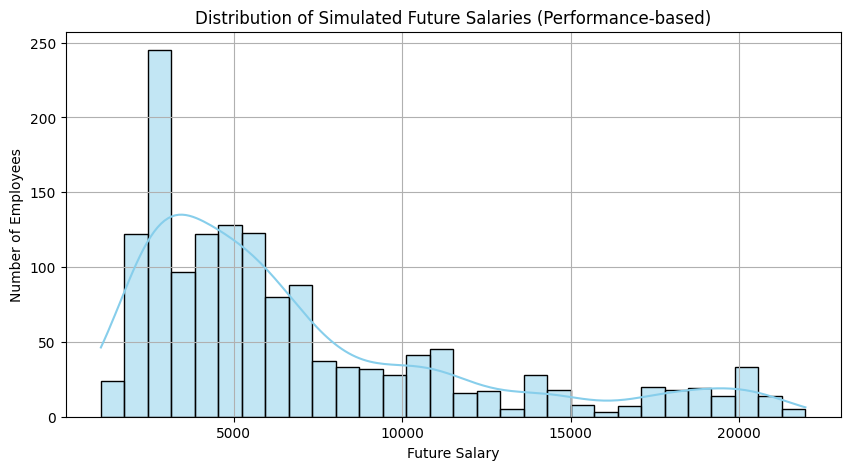

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(df["FutureSalary_perf_based"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Simulated Future Salaries (Performance-based)")
plt.xlabel("Future Salary")
plt.ylabel("Number of Employees")
plt.grid(True)
plt.show()
